In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession

#towrzenie lub pobranie sesji Spark
spark = SparkSession.builder \
    .appName("Analiza zamówień") \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/12 12:20:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
from pyspark.sql.types import StructType,StructField,IntegerType,StringType,DoubleType

#tworzenie schematu
schema = StructType([
    StructField("order_id",IntegerType(),True),
    StructField("customer_id",IntegerType(),True),
    StructField("category",StringType(),True),
    StructField("amount",DoubleType(),True)
])

#przykładowe dane
data = [
    (1,101,"electronics",299.99),
    (2,102,"books",16.22),
    (3,101,"books",22.99),
    (4,103,"electronics",499.0),
    (5,104,"clothing",79.90),
    (6,102,"books",12.97)
]

df = spark.createDataFrame(data,schema)
df.show()

+--------+-----------+-----------+------+
|order_id|customer_id|   category|amount|
+--------+-----------+-----------+------+
|       1|        101|electronics|299.99|
|       2|        102|      books| 16.22|
|       3|        101|      books| 22.99|
|       4|        103|electronics| 499.0|
|       5|        104|   clothing|  79.9|
|       6|        102|      books| 12.97|
+--------+-----------+-----------+------+



In [4]:
#filtorwanie zamówień powyzej 100 zł
df.filter(df["amount"]>100).show()

+--------+-----------+-----------+------+
|order_id|customer_id|   category|amount|
+--------+-----------+-----------+------+
|       1|        101|electronics|299.99|
|       4|        103|electronics| 499.0|
+--------+-----------+-----------+------+



In [5]:
#średnia wartość zamówienia w każdej kategorii
avg_by_category = df.groupBy("category").avg("amount")
avg_by_category.show()

+-----------+-----------------+
|   category|      avg(amount)|
+-----------+-----------------+
|      books|17.39333333333333|
|electronics|          399.495|
|   clothing|             79.9|
+-----------+-----------------+



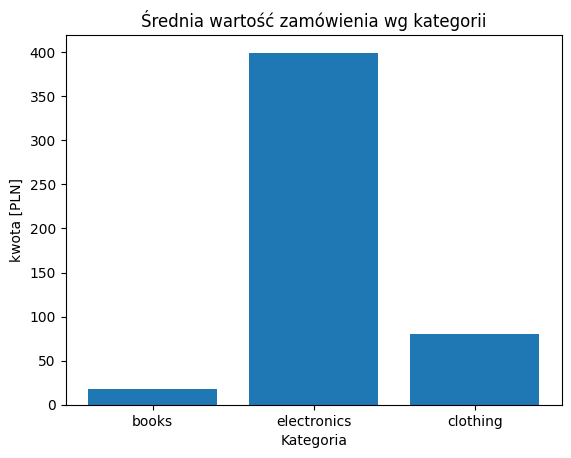

In [6]:
#konwesja do pandas
pdf = avg_by_category.toPandas()

import matplotlib.pyplot as plt

plt.bar(pdf["category"],pdf["avg(amount)"])
plt.title("Średnia wartość zamówienia wg kategorii")
plt.ylabel("kwota [PLN]")
plt.xlabel("Kategoria")
plt.show()

In [7]:
spark.stop()